In [1]:
# Imports

from __future__ import print_function

# Keras
import keras

# Other
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Load Data

In [3]:
from utils.prepare_data import*

ref_q, inputs = load_data(verbose=True)

Reference questions:
 [['We hold ourselves and our team members accountable for results'
  'TEA.2']
 ['The information I need to do my job effectively is readily available'
  'ENA.3']
 ['I know what I need to do to be successful in my role' 'ALI.5']
 ['We are encouraged to be innovative even though some of our initiatives may not succeed'
  'INN.2']]

Labelled data:
 [['I know what my goals are and what I need to do to be successful in my role'
  'ALI.5']
 ['I feel like I can be successful in my role' 'ALI.5']
 ['I know what I need to do to be successful in my role' 'ALI.5']
 ['I understand my role and what is expected of me' 'ALI.5']
 ['I know what is expected of me in my role.' 'ALI.5']]


In [4]:
from utils.prepare_data import *
x_train, y_train, tokenizer, max_length, vocab_size = create_training_vectors(inputs)

Inputs shape:  (297, 20)
Targets shape:  (297, 4)


## Train Network

Building model...
Training model...


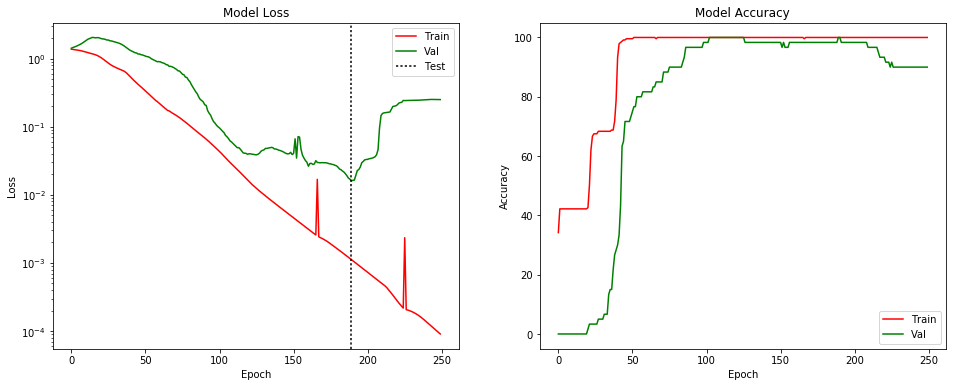

In [22]:
# Train Model
from utils.model import *
from utils.plots import *
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

import os.path

if not os.path.isfile('model/model'):
    print('Building model...')
    model = build_model(vocab_size, max_length, verbose=False)

    # Callbacks
    checkpointer = ModelCheckpoint('model/model', monitor='val_loss', verbose=0, save_best_only=True, \
                                   save_weights_only=False, mode='auto', period=1)

    print('Training model...')
    history = model.fit(x_train, y_train,
                       batch_size=32, epochs=250,
                       verbose=0,
                       validation_split=0.2,
                       shuffle=True,
                       callbacks=[checkpointer])
    
    plot_loss(history)
    
else:
    print('Loading pretrained model...')
    model = load_model('model/model')
    print('Pretrained model loaded')

In [23]:
# Evalute Model

score = model.evaluate(x_train, y_train, verbose=0)
print('    Overall Loss: %.4f' % score[0])
print('Overall Accuracy: %.2f%%' % (score[1]*100))

    Overall Loss: 0.0507
Overall Accuracy: 97.98%


## Test Model

In [141]:
from utils.prepare_data import *

x_test, test_inputs = prepare_test_data(tokenizer, max_length, verbose=True)

Test data:
 ['"My team is enthusiatic about the work we do"'
 '"I understand what I need to do to move up at StarWars"'
 '"I understand clearly what I need to do to be successful in my current role"'
 '"Team members are collectively accountable for achievements"'
 '"Is available when I really need them"'
 '"We are encouraged to be innovative even though some of our initiatives may not succeed"'
 '"I know what is expected of me to be successful in my role"'
 '"The information I need to do my job effectively is readily available"'
 '"We hold ourselves and our team members accountable for results"'
 '"The information I need to do my job effectively is readily available"']


In [139]:
from utils.model import *

test_probs = predict_with_model(x_test, model)

In [136]:
from utils.results import*

first_ind, first_q, first_code, first_score = top_result(test_probs, ref_q)
second_ind, second_q, second_code, second_score = second_result(test_probs, ref_q, first_ind)

In [163]:
for i in range(10):
    print('Question: %s' % test_inputs[i])
    print('Primary Reference Question: %s' % first_q[i])
    print('Primary Reference Question Code: %s' % first_code[i])
    print('Relevance: %0.3f%%' % (first_score[i]*100))
       
    print('Secondary Reference Question: %s' % second_q[i])
    print('Secondary Reference Question Code: %s' % second_code[i])
    print('Relevance: %0.3f%%' % (second_score[i]*100))
    
    print('\n')


Question: "My team is enthusiatic about the work we do"
Primary Reference Question: The information I need to do my job effectively is readily available
Primary Reference Question Code: ENA.3
Relevance: 99.993%
Secondary Reference Question: We are encouraged to be innovative even though some of our initiatives may not succeed
Secondary Reference Question Code: INN.2
Relevance: 0.006%


Question: "I understand what I need to do to move up at StarWars"
Primary Reference Question: I know what I need to do to be successful in my role
Primary Reference Question Code: ALI.5
Relevance: 99.994%
Secondary Reference Question: The information I need to do my job effectively is readily available
Secondary Reference Question Code: ENA.3
Relevance: 0.004%


Question: "I understand clearly what I need to do to be successful in my current role"
Primary Reference Question: I know what I need to do to be successful in my role
Primary Reference Question Code: ALI.5
Relevance: 99.994%
Secondary Reference 

In [161]:
test_probs

array([[0.0000, 0.9999, 0.0000, 0.0001],
       [0.0000, 0.0000, 0.9999, 0.0000],
       [0.0000, 0.0000, 0.9999, 0.0000],
       [0.9999, 0.0000, 0.0000, 0.0000],
       [0.0000, 0.9999, 0.0000, 0.0001],
       [0.0001, 0.0002, 0.0001, 0.9995],
       [0.0000, 0.0000, 0.9999, 0.0000],
       [0.0000, 0.9999, 0.0000, 0.0001],
       [0.9999, 0.0000, 0.0000, 0.0000],
       [0.0000, 0.9999, 0.0000, 0.0001]], dtype=float32)